Importação das bibliotecas necessárias

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

Leitura da base de dados

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Retirando as colunas sem informações que precisamos

In [4]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Alterando o nome das colunas

In [6]:
df.columns =['labels', 'data']

In [7]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Alterando os atributos de ham para 0 e spam para 1

In [8]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam' : 1})
Y = df['b_labels'].values

Separando os dados de teste e treino

In [9]:
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33)

Define um tamanho maximo para o vocabulario, cria um tokenizer limitado ao tamanho do vocabulario maximo, e substitui as sentenças por numeros dentro do array

In [10]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

Calcula o total de tokens unicos

In [11]:
word2idz = tokenizer.word_index
V = len(word2idz)
print('Found %s unique tokens.' % V)

Found 7249 unique tokens.


Dimensão da base de treinos

In [12]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor: ', data_train.shape)

T = data_train.shape[1]

Shape of data train tensor:  (3733, 162)


In [13]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor: ', data_test.shape)

Shape of data test tensor:  (1839, 162)


Arquitetura da rede neural

In [14]:
D = 20

i = Input(shape=(T,)) 
x = Embedding(V + 1, D)(i)

x = Conv1D(32, 3, activation='relu')(x) 
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x) 
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x) 
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x) 

model = Model(i, x)

Compilação e treinamento

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
r = model.fit(
    data_train, Y_train, 
    epochs=5, 
    validation_data=(data_test, Y_test)
)

AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'
Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8266 - loss: 0.4692 - val_accuracy: 0.9489 - val_loss: 0.1668
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9712 - loss: 0.1060 - val_accuracy: 0.9826 - val_loss: 0.0591
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9933 - loss: 0.0221 - val_accuracy: 0.9875 - val_loss: 0.0491
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9978 - loss: 0.0085 - val_accuracy: 0.9869 - val_loss: 0.0480
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9994 - loss: 0.0047 - val_accuracy: 0.9875 - val_loss: 0.0583


Resultados dos errso

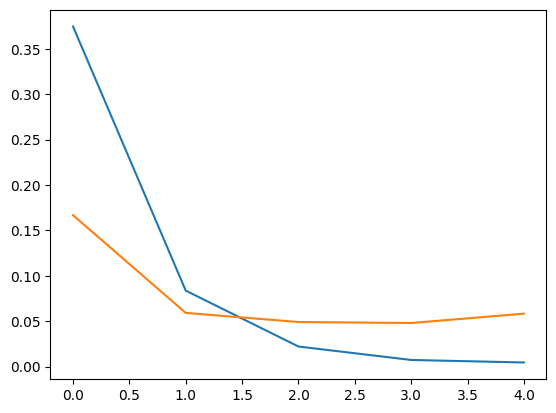

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.show()

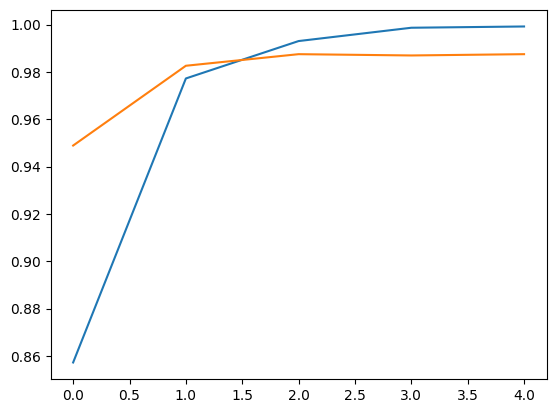

In [19]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.show()
